# 507 Practical Data Engineering Final Project

In [1]:
import numpy as no
import pandas as pd
import pymysql as mysql
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
# conda install -c conda-forge python-kaleido 
import warnings 
warnings.filterwarnings('ignore')

# Part 1: Extract data from the country's population.csv, income.csv, and gravity_books.sql files.

In [2]:
conn=mysql.connect(host='localhost',port=int(3306),user='root',
                   passwd='****',db='gravity_books')

In [3]:
tableNames = pd.read_sql("""SHOW TABLES""", conn) 
tableNames

,Tables_in_gravity_books
0,address
1,address_status
2,author
3,author_books_rank
4,authuor_sell_rank
5,best_selling_books
6,book
7,book_author
8,book_language
9,books_country_profit


In [4]:
# 1. Transaction period in this database:
pd.read_sql_query("""

SELECT * FROM transaction_period;

""" , con = conn) 

,Record_From,Record_To
0,2020-02-06 18:21:33,2023-02-05 16:41:43


In [5]:
# 2. Books sold per year:
pd.read_sql_query("""

SELECT * FROM books_sold_per_year;

""" , con = conn) 

,Orders_Total,Sales_Year
0,2303,2020
1,2469,2021
2,2532,2022
3,246,2023


In [6]:
# 3. Customer total numbers, total orders, and books sold:
pd.read_sql_query("""

SELECT * FROM whole_period_stats;

""" , con = conn) 

,cust_tt,order_tt,book_tt
0,1681,26950,26950


In [7]:
# 4. Top ten customers who purchased the most books: 
pd.read_sql_query("""

SELECT * FROM value_customer;

""" , con = conn) 

,customer_id,first_name,last_name,books_num
0,650,Reuben,Usher,21
1,752,Seline,Waghorne,19
2,846,Godart,Newstead,18
3,495,Della,Mirrlees,17
4,1233,Tallulah,Janata,17
5,492,Tirrell,Littler,17
6,1113,Sean,Franken,17
7,709,Hermia,Donnelly,16
8,631,Dare,Danelut,16
9,753,Horst,Van Der Hoog,16


In [8]:
# 5. Customer's shipping method preference:
shipping = pd.read_sql_query("""

SELECT * FROM ship_meth;

""" , con = conn) 
shipping

,method_name,num,Percent of total
0,Priority,1938,25.66887
1,Express,1910,25.29801
2,International,1861,24.64901
3,Standard,1841,24.38411


In [9]:
# 6. author who published the most books:
pd.read_sql_query("""

SELECT * FROM author_books_rank;

""" , con = conn) 

,author_id,author_name,Books Published
0,8222,Stephen King,70
1,7875,Sandra Brown,46
2,6584,P.G. Wodehouse,45
3,5995,Mercedes Lackey,43
4,6560,Orson Scott Card,40


In [10]:
# 7. The following are the top five best-selling authors: 
pd.read_sql_query("""

SELECT * FROM best_selling_books;

""" , con = conn) 

,book_id,Boook_Name,num
0,4369,Personal Injuries (Kindle County Legal Thrille...,10
1,3954,Murder on the Orient Express (Hercule Poirot ...,10
2,2322,Rereading America: Cultural Contexts for Criti...,9
3,10374,Haruki Murakami and the Music of Words,9
4,10507,King Henry IV Part 1,9
5,2514,Roses Are Red (Alex Cross #6),9
6,4912,Discourse on the Origin of Inequality,9
7,857,The Trial,9
8,2719,Life the Universe and Everything (Hitchhiker'...,8
9,661,Mandy,8


In [11]:
# 8. Top 10 most profitable books:
pd.read_sql_query("""

SELECT * FROM books_profit;

""" , con = conn) 

,book_id,Book_Name,author_name,Profit
0,5995,Frogs/Assemblywomen/Wealth (Loeb Classical Lib...,Mercedes Lackey,2908.09
1,8222,The Reluctant Reformer,Stephen King,2058.00
2,465,Ya Sé Que Te Quiero,Anne Rice,1990.80
3,7761,The Feynman Lectures on Physics Vol 2,Rumiko Takahashi,1666.47
4,2018,Directing the Documentary,Dick Francis,1577.31
5,7875,The Collected Poems 1957-1987,Sandra Brown,1566.76
6,3760,Sauron Defeated: The History of The Lord of th...,James Patterson,1450.41
7,7011,Do Androids Dream Of Electric Sheep?,Plato,1419.88
8,5097,The Winter's Tale,Laurell K. Hamilton,1397.52
9,5583,The Littles and the Lost Children,Margaret Weis,1307.52


In [12]:
# 9. Languages Rank:
pd.read_sql_query("""

SELECT * FROM books_language;

""" , con = conn) 

,language_id,language_name,num,Percent of total
0,1,English,8911,80.08448
1,2,United States English,1409,12.66289
2,4,Spanish,218,1.95920
3,5,British English,214,1.92325
4,3,French,144,1.29415
5,10,German,99,0.88973
6,11,Japanese,46,0.41341
7,6,Multiple Languages,19,0.17076
8,14,Chinese,14,0.12582
9,7,Greek,11,0.09886


In [13]:
# 10. Top 5 profitable customers:
pro_cust = pd.read_sql_query("""

SELECT * FROM cust_profit;

""" , con = conn) 

pro_cust

,customer_id,first_name,last_name,Spent
0,650,Reuben,Usher,841.83
1,752,Seline,Waghorne,740.60
2,846,Godart,Newstead,735.21
3,1233,Tallulah,Janata,674.42
4,1897,Garrick,Rhucroft,672.49


In [14]:
# 10. The top ten cities have the most orders placed by customers:
pd.read_sql_query("""

SELECT * FROM cust_city;

""" , con = conn) 

,city,country_name,COUNT(*),Percent of total
0,Miragoâne,Haiti,340,0.60414
1,Bongandanga,Democratic Republic of the Congo,317,0.56328
2,Shangde,China,305,0.54195
3,Burirao,Philippines,256,0.45488
4,Quebradas,Honduras,245,0.43534
5,Ngunguru,New Zealand,236,0.41935
6,Doong,Philippines,231,0.41046
7,Tshikapa,Democratic Republic of the Congo,220,0.39092
8,Belozërsk,Russia,216,0.38381
9,Chengguan,China,215,0.38203


In [15]:
# 11. Books sold per month:
books_sold_month = pd.read_sql_query("""

SELECT * FROM books_sold_month;

""" , con = conn) 

books_sold_month

,Year,Month,num_books
0,2023,1,212
1,2020,3,218
2,2022,2,200
3,2021,7,204
4,2020,9,206
5,2021,6,213
6,2022,11,213
7,2021,3,214
8,2022,10,215
9,2023,2,34


In [16]:
# 11. Sales by order date:
order_date = pd.read_sql_query("""

SELECT * FROM order_date_sale;

""" , con = conn) 

order_date

,order_date,num_books,Profit
0,2023-01-29 12:05:38,4,41.68
1,2020-03-13 01:22:44,3,17.84
2,2022-02-12 02:35:50,2,16.58
3,2021-07-24 02:10:55,3,17.71
4,2020-09-15 07:19:25,5,55.25
...,...,...,...
7545,2021-11-30 01:06:20,3,37.99
7546,2022-07-12 14:12:08,2,22.34
7547,2022-12-07 09:08:03,3,32.64
7548,2022-02-02 10:58:07,4,49.48


In [17]:
# 12. Combined tables of income, population, and book's sale data:
pd.read_sql_query("""

SELECT * FROM pop_income_books;

""" , con = conn) 

,country_name,books2020,population2020,books2021,population2021,incomegroup
0,Afghanistan,28,38972230,26,40099462,Low income
1,Albania,3,2837849,2,2811666,Upper middle income
2,Argentina,10,45376763,7,45808747,Upper middle income
3,Armenia,22,2805608,20,2790974,Upper middle income
4,Australia,2,25655289,6,25688079,High income
5,Azerbaijan,7,10093121,9,10137750,Upper middle income
6,Belarus,6,9379952,4,9340314,Upper middle income
7,Brazil,84,213196304,101,214326223,Upper middle income
8,Bhutan,4,772506,10,777486,Lower middle income
9,Canada,14,38037204,29,38246108,High income


In [18]:
# 13. combined tables of income, population, and book sale data:
Country_YM_Books = pd.read_sql_query("""

SELECT * FROM Country_YM_Books;

""" , con = conn) 
Country_YM_Books

,country_name,Year,Month,books_sold,Profit
0,Afghanistan,2023,1,7,82.55
1,Afghanistan,2022,4,3,29.31
2,Afghanistan,2022,10,10,72.63
3,Afghanistan,2022,9,11,120.35
4,Afghanistan,2021,4,12,109.85
...,...,...,...,...,...
1213,Philippines,2023,2,7,91.61
1214,Philippines,2021,5,48,514.61
1215,Philippines,2022,4,59,594.34
1216,Philippines,2021,2,40,424.60


In [19]:
# 14. Total Book Sold and Profit by Country and its Population and Income Level
ppi = pd.read_sql_query("""

SELECT * 
FROM profit_pop_in;

""" , con = conn) 

ppi

,country_name,Books_Sold,Profit,population,incomegroup
0,Afghanistan,297,3053.93,40099462,Low income
1,Albania,50,478.14,2811666,Upper middle income
2,Argentina,83,942.44,45808747,Upper middle income
3,Armenia,220,2157.54,2790974,Upper middle income
4,Australia,47,440.92,25688079,High income
...,...,...,...,...,...
59,New Zealand,230,2332.56,5122600,High income
60,Pakistan,298,3017.23,231402117,Lower middle income
61,Panama,18,180.21,4351267,High income
62,Peru,750,7605.11,33715471,Upper middle income


# Part 2: Transform the datatype to what we need:

In [20]:
pro_cust

,customer_id,first_name,last_name,Spent
0,650,Reuben,Usher,841.83
1,752,Seline,Waghorne,740.60
2,846,Godart,Newstead,735.21
3,1233,Tallulah,Janata,674.42
4,1897,Garrick,Rhucroft,672.49


In [21]:
pro_cust['Name'] = pro_cust['first_name'] + ' ' + pro_cust['last_name']
pro_cust

,customer_id,first_name,last_name,Spent,Name
0,650,Reuben,Usher,841.83,Reuben Usher
1,752,Seline,Waghorne,740.60,Seline Waghorne
2,846,Godart,Newstead,735.21,Godart Newstead
3,1233,Tallulah,Janata,674.42,Tallulah Janata
4,1897,Garrick,Rhucroft,672.49,Garrick Rhucroft


In [22]:
order_date

,order_date,num_books,Profit
0,2023-01-29 12:05:38,4,41.68
1,2020-03-13 01:22:44,3,17.84
2,2022-02-12 02:35:50,2,16.58
3,2021-07-24 02:10:55,3,17.71
4,2020-09-15 07:19:25,5,55.25
...,...,...,...
7545,2021-11-30 01:06:20,3,37.99
7546,2022-07-12 14:12:08,2,22.34
7547,2022-12-07 09:08:03,3,32.64
7548,2022-02-02 10:58:07,4,49.48


In [23]:
order_date['order_date'] = pd.to_datetime(order_date['order_date']).dt.date
order_date

,order_date,num_books,Profit
0,2023-01-29,4,41.68
1,2020-03-13,3,17.84
2,2022-02-12,2,16.58
3,2021-07-24,3,17.71
4,2020-09-15,5,55.25
...,...,...,...
7545,2021-11-30,3,37.99
7546,2022-07-12,2,22.34
7547,2022-12-07,3,32.64
7548,2022-02-02,4,49.48


# Part 3: Load the value customer name and daily sales table to csv file:

In [24]:
pro_cust.to_csv('pro_cust.csv')
order_date.to_csv('order_date.csv')

# Part 4: Visualize our data:

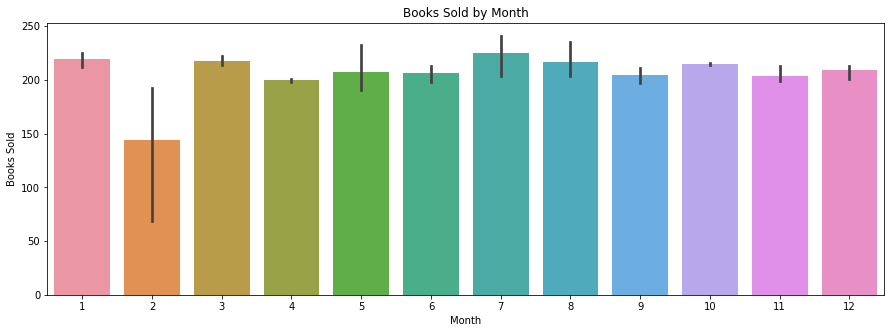

In [25]:
plt.figure(figsize = (15,5))
sns.barplot(data = books_sold_month,y ='num_books',x = 'Month')
plt.xlabel('Month')
plt.ylabel("Books Sold")
plt.title("Books Sold by Month");

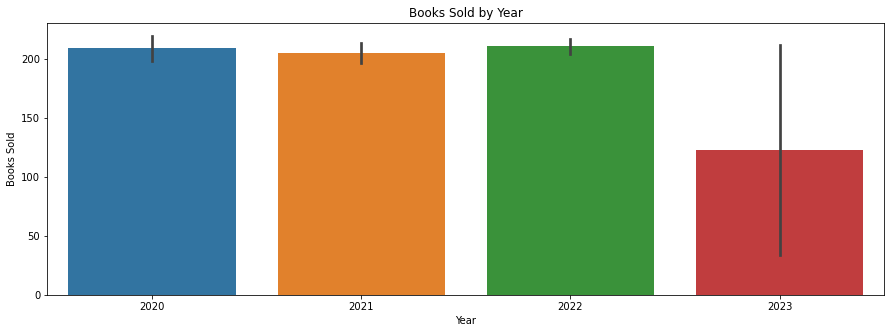

In [26]:
plt.figure(figsize = (15,5))
sns.barplot(data = books_sold_month,y = 'num_books',x = 'Year')
plt.xlabel('Year')
plt.ylabel("Books Sold")
plt.title("Books Sold by Year");

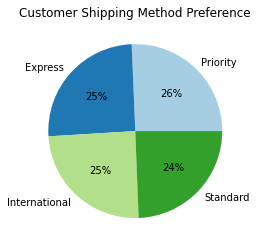

In [27]:
data = shipping['num']
labels = shipping['method_name']
custom_palette = sns.color_palette("Paired", 9)
plt.pie(data, labels = labels,colors = custom_palette, autopct='%.0f%%')
plt.title('Customer Shipping Method Preference')
plt.show()

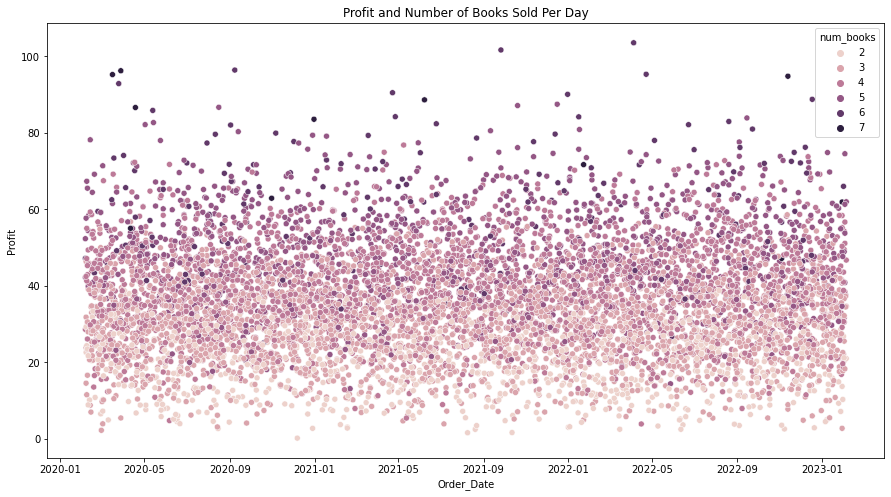

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=order_date,x='order_date',y='Profit',hue='num_books')
plt.xlabel('Order_Date')
plt.ylabel("Profit")
plt.title("Profit and Number of Books Sold Per Day");

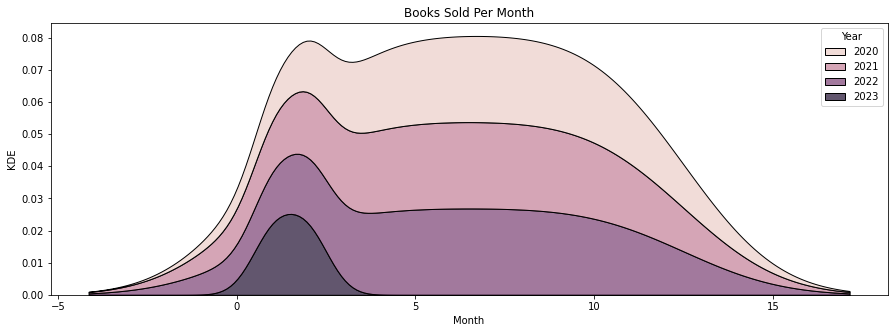

In [29]:
plt.figure(figsize = (15,5))
sns.kdeplot(data = books_sold_month,x='Month', hue = 'Year', multiple = 'stack')
plt.xlabel("Month")
plt.ylabel("KDE")
plt.title("Books Sold Per Month");

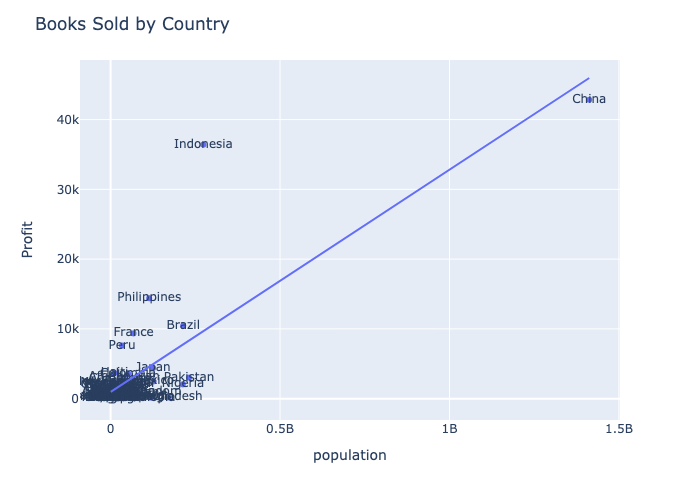

In [30]:
fig = px.scatter(ppi, x="population", y="Profit", trendline="ols", text="country_name",)
fig.update_layout(title='Books Sold by Country')
fig.show("png")

In [31]:
# Exclude the outliers:
ppi = ppi.drop(ppi[ppi['country_name']== 'China'].index)
ppi = ppi.drop(ppi[ppi['country_name']== 'Indonesia'].index)

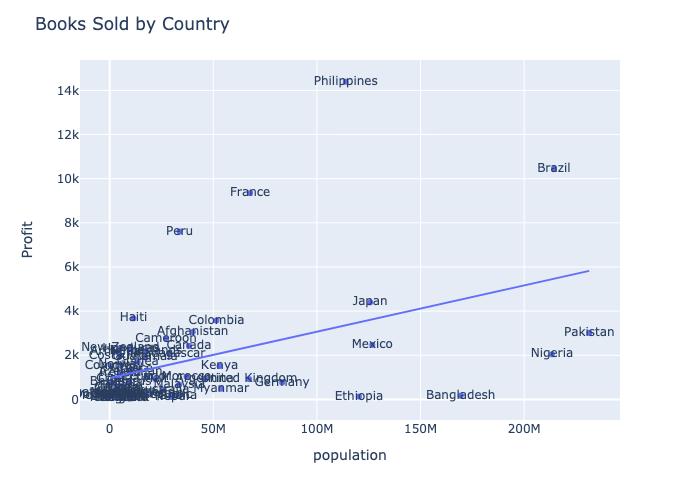

In [32]:
fig2 = px.scatter(ppi, x="population", y="Profit", trendline="ols", text="country_name",)
fig2.update_layout(title='Books Sold by Country')
fig2.show("png")